# An√°lise de Dados - Camanda Silver (Esquema Estrela)

## Introdu√ß√£o

Este notebook tem como objetivo realizar a **an√°lise explorat√≥ria e visualiza√ß√£o dos dados tratados** da **Camada Silver**, utilizando o arquivo `treated_dataset.csv` como base.  
A partir das regras de neg√≥cio definidas no documento `Silver.md`, esta camada consolida os dados da **Camada Bronze** em um modelo dimensional estruturado no formato **Star Schema (Esquema em Estrela)**, com uma tabela fato central (**FatoItensPedido**) e suas respectivas dimens√µes (**DimPedidos**, **DimProdutos**, **DimVendedores** e **DimData**).

O prop√≥sito deste notebook √© oferecer **insights visuais e m√©tricas de neg√≥cio** que auxiliem na compreens√£o das principais vari√°veis relacionadas ao processo de vendas, log√≠stica, satisfa√ß√£o do cliente e desempenho de vendedores e produtos.

Ser√£o aplicadas an√°lises como:
- **Indicadores-Chave de Desempenho (KPIs):** volume bruto de vendas (GMV), taxa m√©dia de frete, n√∫mero de pedidos, avalia√ß√£o m√©dia e √≠ndice de entregas no prazo;
- **S√©ries temporais** de vendas ao longo dos meses;
- **An√°lise de categorias** e **vendedores de maior desempenho**;
- **Distribui√ß√£o do tempo de entrega** e sua rela√ß√£o com a satisfa√ß√£o do cliente;
- **An√°lises de pagamento**, incluindo parcelamentos e m√©todos de pagamento mais utilizados;
- **Estudo geogr√°fico** simplificado com base nas coordenadas de clientes e vendedores.

Al√©m de servir como uma ferramenta explorat√≥ria, este notebook tamb√©m tem o papel de **validar a integridade e consist√™ncia dos dados Silver**, garantindo que as transforma√ß√µes realizadas na etapa anterior de ETL (limpeza, enriquecimento e c√°lculo de m√©tricas) estejam coerentes com o modelo de neg√≥cio proposto.

> Em resumo, este notebook traduz os dados tratados da camada Silver em **informa√ß√µes gerenciais visuais**, permitindo identificar padr√µes, tend√™ncias e oportunidades de melhoria no processo de vendas e distribui√ß√£o.


In [22]:
# Aqui vai as importa√ß√µes necess√°rias para a an√°lise funcionar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

## Lendo os dados

In [2]:
DATA_PATH = '../Silver/treated_dataset.csv'

pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 160)
df = pd.read_csv(DATA_PATH)

print('Linhas, Colunas:', df.shape)
df.head()

Linhas, Colunas: (112650, 28)


order_id order_status order_purchase_timestamp order_purchase_date  delivery_time_days  delivery_delay_days  delivered_late  \
0  00010242fe8c5a6d1ba2dd792cb16214    delivered      2017-09-13 08:59:02          2017-09-13                 7.0                 -9.0               0   
1  00018f77f2f0320c557190d7a144bdd3    delivered      2017-04-26 10:53:06          2017-04-26                16.0                 -3.0               0   
2  000229ec398224ef6ca0657da4fc703e    delivered      2018-01-14 14:33:31          2018-01-14                 7.0                -14.0               0   
3  00024acbcdf0a6daa1e931b038114c75    delivered      2018-08-08 10:00:35          2018-08-08                 6.0                 -6.0               0   
4  00042b26cf59d7ce69dfabb4e55b4fd9    delivered      2017-02-04 13:57:51          2017-02-04                25.0                -16.0               0   

                        customer_id          customer_city customer_state  customer_zip_code_prefix  order_item_id                        product_id  \
0  3ce436f183e68e07877b285a838db11a  campos dos goytacazes             RJ                     28013              1  4244733e06e7ecb4970a6e2683c13e61   
1  f6dd3ec061db4e3987629fe6b26e5cce        santa fe do sul             SP                     15775              1  e5f2d52b802189ee658865ca93d83a8f   
2  6489ae5e4333f3693df5ad4372dab6d3          para de minas             MG                     35661              1  c777355d18b72b67abbeef9df44fd0fd   
3  d4eb9395c8c0431ee92fce09860c5a06                atibaia             SP                     12952              1  7634da152a4610f1595efa32f14722fc   
4  58dbd0b2d70206bf40e62cd34e84d795        varzea paulista             SP                     13226              1  ac6c3623068f30de03045865e4e10089   

                          seller_id   price  freight_value  shipping_limit_date product_category_en product_category_name  product_photos_qty  \
0  48436dade18ac8b2bce089ec2a041202   58.90          13.29  2017-09-19 09:45:35          cool_stuff            cool_stuff                 4.0   
1  dd7ddc04e1b6c2c614352b383efe2d36  239.90          19.93  2017-05-03 11:05:13            pet_shop              pet_shop                 2.0   
2  5b51032eddd242adc84c38acab88f23d  199.00          17.87  2018-01-18 14:48:30     furniture_decor      moveis_decoracao                 2.0   
3  9d7a1d34a5052409006425275ba1c2b4   12.99          12.79  2018-08-15 10:10:18           perfumery            perfumaria                 1.0   
4  df560393f3a51e74553ab94004ba5c87  199.90          18.14  2017-02-13 13:57:51        garden_tools    ferramentas_jardim                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm    seller_city seller_state  seller_zip_code_prefix  total_payment_value  
0             650.0               28.0                9.0              14.0  volta redonda           SP                   27277                72.19  
1           30000.0               50.0               30.0              40.0      sao paulo           SP                    3471               259.83  
2            3050.0               33.0               13.0              33.0  borda da mata           MG                   37564               216.87  
3             200.0               16.0               10.0              15.0         franca           SP                   14403                25.78  
4            3750.0               35.0               40.0              30.0         loanda           PR                   87900               218.04

In [ ]:
def has_cols(frame, cols):
    return all(c in frame.columns for c in cols)

def try_parse_datetime(frame, cols):
    for c in cols:
        if c in frame.columns and not np.issubdtype(frame[c].dtype, np.datetime64):
            try:
                frame[c] = pd.to_datetime(frame[c])
            except Exception:
                pass

datetime_cols = [
    'order_purchase_timestamp','order_delivered_customer_date','order_approved_at',
    'order_delivered_carrier_date','order_estimated_delivery_date','review_creation_date',
    'review_answer_timestamp','shipping_limit_date','data_completa'
]
try_parse_datetime(df, datetime_cols)

## Esquema Efetivo (Camada Silver)

Nesta etapa, o objetivo √© **verificar a estrutura real dos dados** carregados a partir do arquivo `treated_dataset.csv`, comparando-a com o **modelo dimensional planejado** para a camada Silver.

A Camada Silver representa os dados **limpos, consolidados e organizados** em um formato anal√≠tico, geralmente seguindo o **esquema em estrela (Star Schema)**.  
Esse esquema √© composto por uma **tabela fato** central ‚Äî que cont√©m as m√©tricas num√©ricas de neg√≥cio ‚Äî e diversas **tabelas de dimens√£o**, que trazem o contexto descritivo das transa√ß√µes (como produtos, pedidos, vendedores e tempo).

Aqui, a verifica√ß√£o do *‚ÄúEsquema Efetivo‚Äù* serve para:
- **Confirmar** quais colunas est√£o presentes no dataset tratado;
- **Comparar** com as colunas esperadas para cada entidade da camada Silver (`FATOITENSPEDIDO`, `DIMPEDIDOS`, `DIMPRODUTOS`, `DIMVENDEDORES`, `DIMDATA`);
- **Identificar lacunas** ou campos ausentes que possam impactar as an√°lises posteriores.

Essa checagem garante que o conjunto de dados esteja coerente com o modelo conceitual do Data Warehouse, permitindo que os pr√≥ximos passos (KPIs e visualiza√ß√µes) sejam realizados com seguran√ßa e consist√™ncia.


In [14]:

from collections import OrderedDict

expected_now = OrderedDict({
    "FATOITENSPEDIDO": ['freight_value', 'order_id', 'order_item_id', 'price', 'product_id', 'seller_id', 'shipping_limit_date'],
    "DIMPEDIDOS": ['customer_city', 'customer_state', 'customer_zip_code_prefix', 'order_id', 'order_purchase_timestamp', 'order_status'],
    "DIMPRODUTOS": ['product_category_name', 'product_height_cm', 'product_id', 'product_length_cm', 'product_photos_qty', 'product_weight_g', 'product_width_cm'],
    "DIMVENDEDORES": ['seller_city', 'seller_id', 'seller_state', 'seller_zip_code_prefix'],
    "DIMDATA": []
})

present_now = {k: [c for c in v if c in df.columns] for k,v in expected_now.items()}
missing_now = {k: [c for c in v if c not in df.columns] for k,v in expected_now.items()}

print("=== Colunas Presentes por Entidade (esperadas agora) ===")
for ent, cols in present_now.items():
    print(f"\n[{ent}] ({len(cols)} colunas)")
    print(sorted(cols))

print("\n=== Colunas Ausentes (entre as esperadas agora) ===")
for ent, cols in missing_now.items():
    if cols:
        print(f"\n[{ent}] ({len(cols)} faltando)")
        print(sorted(cols))

=== Colunas Presentes por Entidade (esperadas agora) ===

[FATOITENSPEDIDO] (7 colunas)
['freight_value', 'order_id', 'order_item_id', 'price', 'product_id', 'seller_id', 'shipping_limit_date']

[DIMPEDIDOS] (6 colunas)
['customer_city', 'customer_state', 'customer_zip_code_prefix', 'order_id', 'order_purchase_timestamp', 'order_status']

[DIMPRODUTOS] (7 colunas)
['product_category_name', 'product_height_cm', 'product_id', 'product_length_cm', 'product_photos_qty', 'product_weight_g', 'product_width_cm']

[DIMVENDEDORES] (4 colunas)
['seller_city', 'seller_id', 'seller_state', 'seller_zip_code_prefix']

[DIMDATA] (0 colunas)
[]

=== Colunas Ausentes (entre as esperadas agora) ===


## Prepara√ß√£o (Datas e Dimens√£o de Tempo Derivada)

Nesta etapa, o foco √© realizar o **pr√©-processamento das colunas temporais** e a **cria√ß√£o de uma dimens√£o de tempo derivada**, fundamental para an√°lises temporais consistentes dentro do modelo dimensional da Camada Silver.

A manipula√ß√£o de dados temporais √© essencial para compreender **tend√™ncias de neg√≥cio**, **sazonalidade** e **comportamento de vendas ao longo do tempo**.  
Como o arquivo `treated_dataset.csv` consolidado nem sempre cont√©m uma tabela de datas expl√≠cita (`DIMDATA`), √© comum **derivar essa dimens√£o em mem√≥ria** a partir das colunas de timestamp dispon√≠veis, como `order_purchase_timestamp` e `shipping_limit_date`.

Durante essa prepara√ß√£o:
- As colunas de data s√£o convertidas para o formato `datetime`, garantindo consist√™ncia de tipo;  
- S√£o extra√≠dos atributos derivados como **ano, m√™s, dia e dia da semana**;  
- √â criada uma **chave de per√≠odo (`ano_mes`)**, √∫til para agrega√ß√µes mensais e compara√ß√µes de desempenho.

Essa dimens√£o de tempo derivada permitir√° que os indicadores (KPIs) e gr√°ficos nos pr√≥ximos pontos possam ser analisados **cronologicamente**, facilitando a visualiza√ß√£o da evolu√ß√£o das vendas e dos padr√µes de opera√ß√£o ao longo dos meses.


In [ ]:
def to_datetime_safe(series):
    try:
        return pd.to_datetime(series, errors='coerce')
    except Exception:
        return pd.to_datetime(pd.Series([np.nan]*len(series)))

date_cols = []
if 'order_purchase_timestamp' in df.columns:
    df['order_purchase_timestamp'] = to_datetime_safe(df['order_purchase_timestamp'])
    date_cols.append('order_purchase_timestamp')

if 'shipping_limit_date' in df.columns:
    df['shipping_limit_date'] = to_datetime_safe(df['shipping_limit_date'])
    date_cols.append('shipping_limit_date')

print("Colunas tratadas como data:", date_cols)

if 'order_purchase_timestamp' in df.columns and df['order_purchase_timestamp'].notna().any():
    dcal = df[['order_purchase_timestamp']].dropna().copy()
    dcal['ano'] = dcal['order_purchase_timestamp'].dt.year
    dcal['mes'] = dcal['order_purchase_timestamp'].dt.month
    dcal['dia'] = dcal['order_purchase_timestamp'].dt.day
    dcal['dia_da_semana'] = dcal['order_purchase_timestamp'].dt.dayofweek  # 0=Seg
    dcal['ano_mes'] = dcal['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
    dimdata = dcal.drop_duplicates('order_purchase_timestamp')
else:
    dimdata = pd.DataFrame()

dimdata.head()

Colunas tratadas como data: ['order_purchase_timestamp', 'shipping_limit_date']


order_purchase_timestamp   ano  mes  dia  dia_da_semana    ano_mes
0      2017-09-13 08:59:02  2017    9   13              2 2017-09-01
1      2017-04-26 10:53:06  2017    4   26              2 2017-04-01
2      2018-01-14 14:33:31  2018    1   14              6 2018-01-01
3      2018-08-08 10:00:35  2018    8    8              2 2018-08-01
4      2017-02-04 13:57:51  2017    2    4              5 2017-02-01

## KPIs de Neg√≥cio (Camada Silver)

Nesta etapa, s√£o calculados os **principais Indicadores-Chave de Desempenho (KPIs)** da camada Silver, que resumem de forma quantitativa o comportamento do neg√≥cio a partir dos dados tratados.

Como esta camada representa dados j√° **limpos e integrados**, √© poss√≠vel extrair **m√©tricas consolidadas** diretamente da tabela fato (`FATOITENSPEDIDO`) e das dimens√µes relacionadas.  
Esses KPIs oferecem uma vis√£o de alto n√≠vel sobre **volume de vendas**, **composi√ß√£o de custos log√≠sticos** e **estrutura dos pedidos**.

Os indicadores considerados nesta an√°lise s√£o:

- **GMV (Gross Merchandise Volume):** soma total dos valores de produtos vendidos (`price`), representando o faturamento bruto;  
- **Frete % no Ticket (m√©dio):** m√©dia da rela√ß√£o entre o valor do frete (`freight_value`) e o pre√ßo do produto (`price`), indicando o peso log√≠stico no valor total;  
- **Pedidos distintos:** n√∫mero de pedidos √∫nicos (`order_id`), √∫til para medir volume de transa√ß√µes;  
- **Itens por pedido (m√©dio):** m√©dia de itens por pedido, refletindo o tamanho m√©dio das compras.

Esses indicadores formam a base para compreender a **sa√∫de operacional e comercial do neg√≥cio**, permitindo compara√ß√µes entre per√≠odos e subsidiando as visualiza√ß√µes que seguem nas pr√≥ximas etapas do notebook.


In [ ]:
kpi = {}

kpi['GMV'] = float(df['price'].sum()) if 'price' in df.columns else np.nan

if {'freight_value','price'}.issubset(df.columns):
    valid = df[df['price'] > 0].copy()
    kpi['Frete_%_no_Ticket_m√©dio'] = float((valid['freight_value']/valid['price']).replace([np.inf,-np.inf], np.nan).mean())
else:
    kpi['Frete_%_no_Ticket_m√©dio'] = np.nan

if 'order_id' in df.columns:
    kpi['Pedidos_distintos'] = int(df['order_id'].nunique())
    kpi['Itens_por_pedido_m√©dio'] = float(df.groupby('order_id').size().mean())
else:
    kpi['Pedidos_distintos'] = np.nan
    kpi['Itens_por_pedido_m√©dio'] = np.nan

out = pd.DataFrame([kpi]).T.rename(columns={0: 'valor'})

def fmt(v):
    if pd.isna(v):
        return "(sem dados)"
    if isinstance(v, (int, np.integer)):
        return f"{v:,.0f}".replace(",", ".")
    if abs(v) >= 1000:
        return ("R$ " + f"{v:,.2f}").replace(".", ",")
    if 0 <= v <= 1:
        return f"{v*100:.2f} %".replace(".", ",")
    s = f"{v:.2f}".replace(".", ",")
    return s

out['valor_formatado'] = out['valor'].apply(fmt)
out

valor   valor_formatado
GMV                      1.359164e+07  R$ 13,591,643,70
Frete_%_no_Ticket_m√©dio  3.208635e-01           32,09 %
Pedidos_distintos        9.866600e+04      R$ 98,666,00
Itens_por_pedido_m√©dio   1.141731e+00              1,14

## S√©rie Temporal (GMV por M√™s)

Esta etapa tem como objetivo analisar o **comportamento temporal das vendas**, utilizando a m√©trica de **GMV (Gross Merchandise Volume)**; ou volume bruto de mercadorias vendidas; ao longo do tempo.

Ao organizar as informa√ß√µes por **m√™s de compra (`ano_mes`)**, √© poss√≠vel observar como o desempenho comercial evolui durante o per√≠odo analisado, identificando **tend√™ncias, sazonalidades e poss√≠veis quedas ou picos de demanda**.

O c√°lculo √© realizado agrupando o valor total de vendas (`price`) por m√™s, com base na coluna de data `order_purchase_timestamp`.  
Essa abordagem permite visualizar:
- **Evolu√ß√£o mensal das vendas;**
- **Comportamentos sazonais**, como aumento em determinados meses do ano;
- **Impactos operacionais ou externos** que possam ter influenciado o volume de pedidos.

O resultado √© uma **s√©rie temporal de GMV**, representada graficamente para facilitar a interpreta√ß√£o visual, servindo como ponto de partida para compara√ß√µes hist√≥ricas e proje√ß√µes futuras de desempenho.


GMV
ano_mes               
2016-09-01      267.36
2016-10-01    49507.66
2016-12-01       10.90
2017-01-01   120312.87
2017-02-01   247303.02
2017-03-01   374344.30
2017-04-01   359927.23
2017-05-01   506071.14
2017-06-01   433038.60
2017-07-01   498031.48
2017-08-01   573971.68
2017-09-01   624401.69
2017-10-01   664219.43
2017-11-01  1010271.37
2017-12-01   743914.17
2018-01-01   950030.36
2018-02-01   844178.71
2018-03-01   983213.44
2018-04-01   996647.75
2018-05-01   996517.68
2018-06-01   865124.31
2018-07-01   895507.22
2018-08-01   854686.33
2018-09-01      145.00

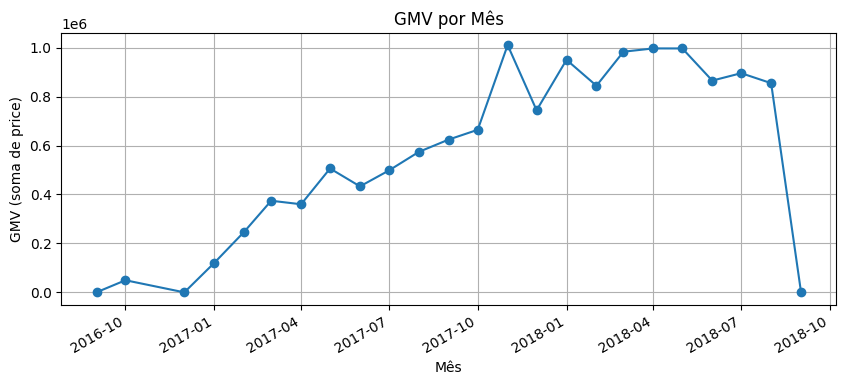

In [17]:

if 'order_purchase_timestamp' in df.columns and df['order_purchase_timestamp'].notna().any() and 'price' in df.columns:
    ts = df[['order_purchase_timestamp','price']].dropna().copy()
    ts['ano_mes'] = ts['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
    series = ts.groupby('ano_mes')['price'].sum().sort_index()
    display(series.to_frame('GMV'))
    plt.figure(figsize=(10,4))
    series.plot(marker='o')
    plt.title('GMV por M√™s')
    plt.xlabel('M√™s')
    plt.ylabel('GMV (soma de price)')
    plt.grid(True)
    plt.show()
else:
    print("Sem colunas suficientes para s√©rie temporal (requer order_purchase_timestamp e price).")


## Rankings de Categorias e Vendedores

Nesta etapa, o foco √© identificar **quais produtos e vendedores mais contribuem para o desempenho financeiro** do neg√≥cio, por meio da an√°lise do **GMV (Gross Merchandise Volume)** ‚Äî a soma total dos valores de vendas.

A partir da tabela fato (`FATOITENSPEDIDO`) e das dimens√µes de **produtos (`DIMPRODUTOS`)** e **vendedores (`DIMVENDEDORES`)**, √© poss√≠vel construir **rankings** que destacam:
- As **categorias de produto** com maior volume de vendas total;
- Os **vendedores mais representativos** em termos de faturamento.

Essas visualiza√ß√µes permitem responder perguntas como:
- Quais tipos de produtos s√£o mais rent√°veis?
- Existe concentra√ß√£o de vendas em poucos vendedores?
- H√° categorias com desempenho sazonal ou consistentemente alto?

O **ranking de categorias** auxilia na **an√°lise de portf√≥lio de produtos**, enquanto o **ranking de vendedores** apoia a **avalia√ß√£o de performance comercial** e a **gest√£o de parcerias**.  
Ambos s√£o apresentados em gr√°ficos de barras horizontais, que facilitam a compara√ß√£o visual entre as entidades e ajudam a identificar oportunidades de otimiza√ß√£o de estrat√©gias de venda.


GMV
product_category_name             
beleza_saude            1258681.34
relogios_presentes      1205005.68
cama_mesa_banho         1036988.68
esporte_lazer            988048.97
informatica_acessorios   911954.32
moveis_decoracao         729762.49
cool_stuff               635290.85
utilidades_domesticas    632248.66
automotivo               592720.11
ferramentas_jardim       485256.46
brinquedos               483946.60
bebes                    411764.89
perfumaria               399124.87
telefonia                323667.53
moveis_escritorio        273960.70

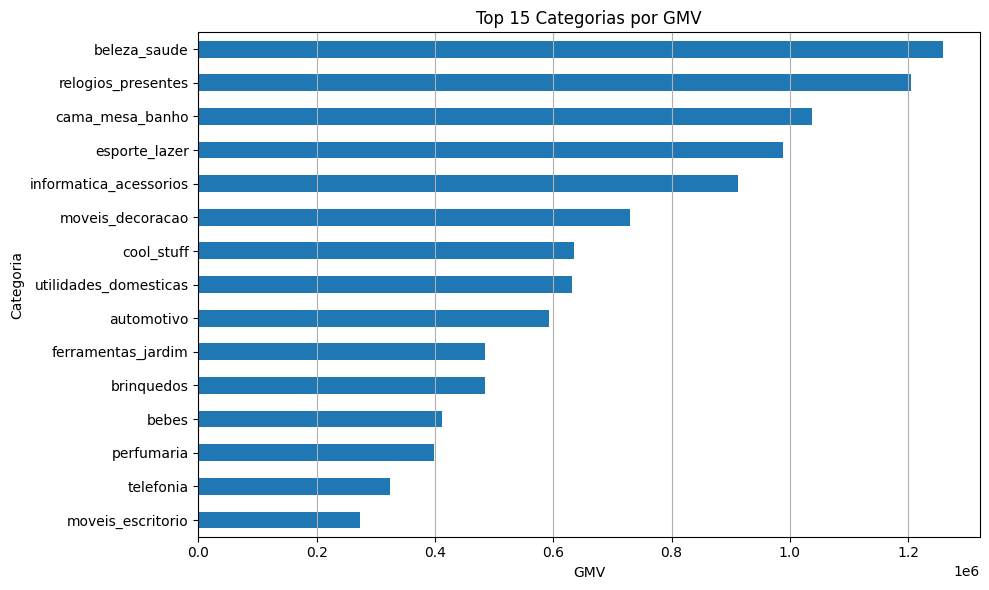

GMV
seller_id                                  
4869f7a5dfa277a7dca6462dcf3b52b2  229472.63
53243585a1d6dc2643021fd1853d8905  222776.05
4a3ca9315b744ce9f8e9374361493884  200472.92
fa1c13f2614d7b5c4749cbc52fecda94  194042.03
7c67e1448b00f6e969d365cea6b010ab  187923.89
7e93a43ef30c4f03f38b393420bc753a  176431.87
da8622b14eb17ae2831f4ac5b9dab84a  160236.57
7a67c85e85bb2ce8582c35f2203ad736  141745.53
1025f0e2d44d7041d6cf58b6550e0bfa  138968.55
955fee9216a65b617aa5c0531780ce60  135171.70
46dc3b2cc0980fb8ec44634e21d2718e  128111.19
6560211a19b47992c3666cc44a7e94c0  123304.83
620c87c171fb2a6dd6e8bb4dec959fc6  114774.50
7d13fca15225358621be4086e1eb0964  113628.97
5dceca129747e92ff8ef7a997dc4f8ca  112155.53

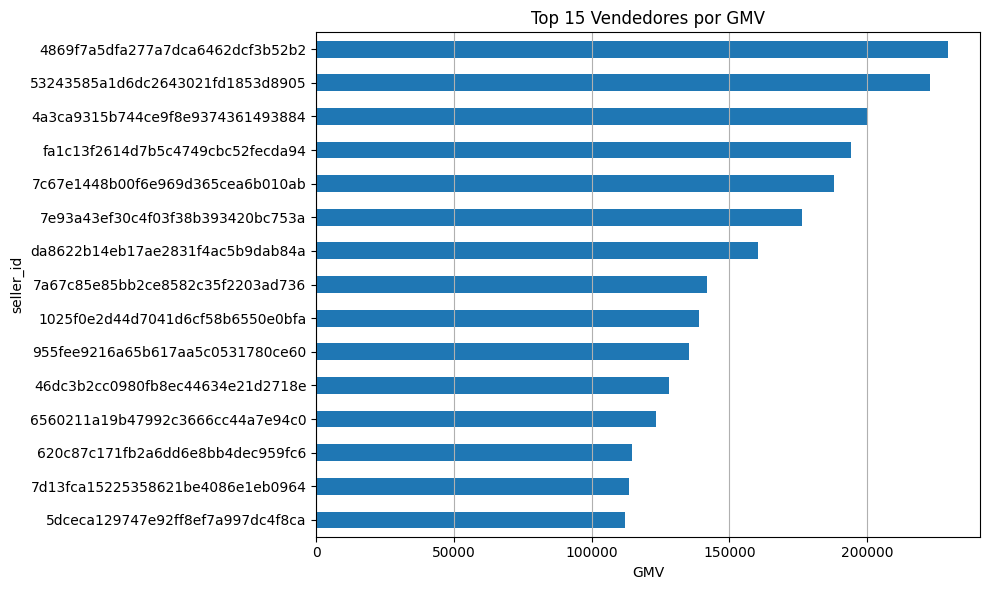

In [ ]:

if {'product_category_name','price'}.issubset(df.columns):
    top_cat = df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(15)
    display(top_cat.to_frame('GMV'))
    plt.figure(figsize=(10,6))
    top_cat.sort_values().plot(kind='barh')
    plt.title('Top 15 Categorias por GMV')
    plt.xlabel('GMV')
    plt.ylabel('Categoria')
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("Sem 'product_category_name' e 'price' para ranking de categorias.")

if {'seller_id','price'}.issubset(df.columns):
    top_seller = df.groupby('seller_id')['price'].sum().sort_values(ascending=False).head(15)
    display(top_seller.to_frame('GMV'))
    plt.figure(figsize=(10,6))
    top_seller.sort_values().plot(kind='barh')
    plt.title('Top 15 Vendedores por GMV')
    plt.xlabel('GMV')
    plt.ylabel('seller_id')
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("Sem 'seller_id' e 'price' para ranking de vendedores.")


## Participa√ß√£o do Frete no Ticket (%)

Nesta etapa, o objetivo √© compreender como o **valor do frete** se relaciona com o **valor total do produto**, analisando a propor√ß√£o entre `freight_value` e `price`.  
Essa m√©trica, expressa em porcentagem, indica o **peso log√≠stico do frete no pre√ßo final** de cada item, sendo fundamental para avaliar **efici√™ncia operacional**, **competitividade de pre√ßos** e **impacto do custo de entrega** no neg√≥cio.

Para explorar o comportamento dessa vari√°vel, s√£o utilizadas tr√™s abordagens visuais complementares:

---

### **1. Histograma ‚Äî Distribui√ß√£o Geral**

O **histograma** mostra como os pedidos se distribuem em diferentes faixas de porcentagem de frete.  
Cada barra representa um intervalo percentual (por exemplo, 0‚Äì10%, 10‚Äì20%, etc.), e a **altura** indica a quantidade de pedidos que possuem aquela propor√ß√£o de frete em rela√ß√£o ao pre√ßo.  
Esse gr√°fico ajuda a visualizar onde est√° concentrada a maior parte dos casos (geralmente entre **0% e 50%**), al√©m de revelar a presen√ßa de **outliers** ‚Äî pedidos com frete muito alto.

---

### **2. Boxplot ‚Äî Medidas de Dispers√£o e Outliers**

O **boxplot** complementa o histograma, apresentando um **resumo estat√≠stico** da distribui√ß√£o.  
Ele exibe:
- A **mediana** (linha central da caixa);
- O **intervalo interquartil (IQR)**, que cobre 50% dos casos mais comuns;
- Os **outliers**, mostrados como pontos individuais fora dos limites normais.

Essa visualiza√ß√£o √© ideal para identificar **assimetria**, **variabilidade** e **presen√ßa de fretes an√¥malos** (valores extremamente altos em rela√ß√£o ao produto).

---

### **3. Escala Logar√≠tmica ‚Äî Amplia√ß√£o dos Detalhes**

Em alguns casos, h√° uma **concentra√ß√£o muito grande de pedidos com frete baixo (at√© 50%)** e poucos casos com frete acima de 100% ou 500%.  
Para corrigir essa distor√ß√£o visual, √© utilizada uma **escala logar√≠tmica no eixo X**, que **comprime os valores altos e expande os baixos**.  
Assim, √© poss√≠vel visualizar toda a faixa de dados (de 0,1% a 1000%) sem que a concentra√ß√£o pr√≥xima de zero ‚Äúesprema‚Äù o gr√°fico.

Essa transforma√ß√£o **n√£o altera os dados**, apenas muda a forma como o eixo √© representado, permitindo perceber tanto os casos t√≠picos quanto os extremos de maneira mais equilibrada.

---

Em conjunto, esses tr√™s gr√°ficos permitem uma an√°lise completa da **participa√ß√£o do frete no ticket**, unindo:
- Frequ√™ncia de ocorr√™ncia (histograma),
- Medidas estat√≠sticas (boxplot),
- E uma vis√£o ajustada para valores extremos (escala log).

Essa combina√ß√£o facilita a tomada de decis√µes sobre **precifica√ß√£o, log√≠stica e estrat√©gias de entrega**, tornando vis√≠vel como o custo de frete se comporta em diferentes cen√°rios de venda.


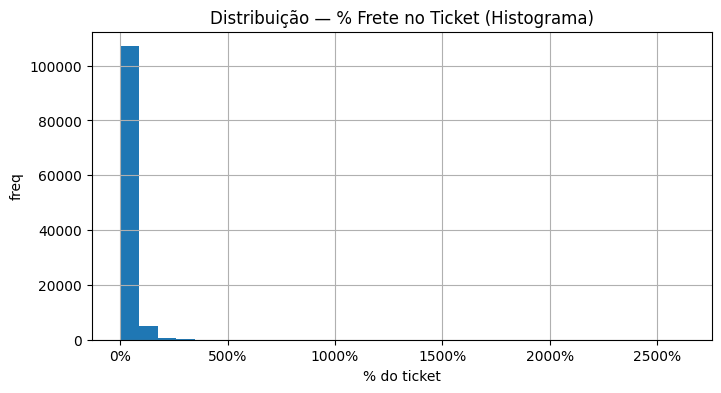

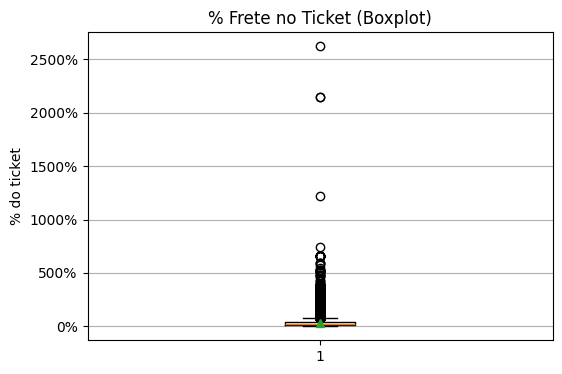

pct_frete
count  112650.000000
mean        0.320864
std         0.349894
min         0.000000
25%         0.134034
50%         0.231356
75%         0.393036
max        26.235294

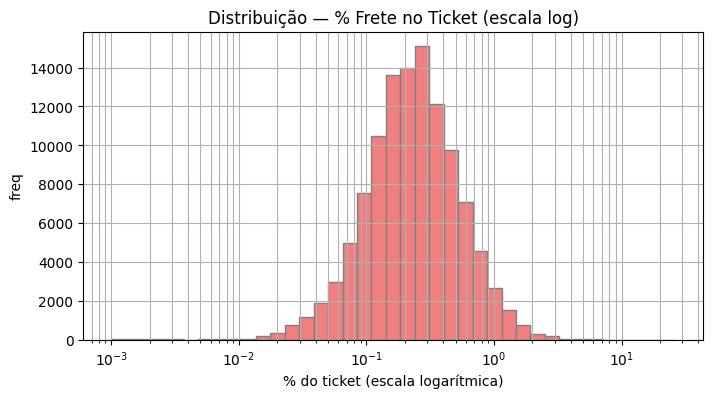

In [ ]:
if {'freight_value','price'}.issubset(df.columns):
    valid = df[df['price'] > 0].copy()
    valid['pct_frete'] = (valid['freight_value'] / valid['price']).replace([np.inf, -np.inf], np.nan)
    pct = valid['pct_frete'].dropna()

    if len(pct) > 0:
        plt.figure(figsize=(8,4))
        plt.hist(pct, bins=30)
        plt.title('Distribui√ß√£o ‚Äî % Frete no Ticket (Histograma)')
        plt.xlabel('% do ticket')
        plt.ylabel('freq')
        plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
        plt.grid(True)
        plt.show()

        plt.figure(figsize=(6,4))
        plt.boxplot(pct, vert=True, whis=1.5, showmeans=True)
        plt.title('% Frete no Ticket (Boxplot)')
        plt.ylabel('% do ticket')
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
        plt.grid(True, axis='y')
        plt.show()

        desc = pct.describe(percentiles=[.25,.5,.75])
        display(desc.to_frame('pct_frete'))
    else:
        print("Sem valores v√°lidos para pct_frete.")
else:
    print("Sem 'freight_value' e 'price' para calcular participa√ß√£o do frete.")

plt.figure(figsize=(8,4))
plt.hist(pct, bins=np.logspace(np.log10(0.001), np.log10(pct.max()), 40), color='lightcoral', edgecolor='gray')
plt.xscale('log')
plt.title('Distribui√ß√£o ‚Äî % Frete no Ticket (escala log)')
plt.xlabel('% do ticket (escala logar√≠tmica)')
plt.ylabel('freq')
plt.grid(True, which='both')
plt.show()

## Distribui√ß√£o de Itens por Pedido (Discreto + CDF)

Nesta etapa, o objetivo √© analisar o **comportamento da quantidade de itens por pedido**, uma m√©trica essencial para compreender **o perfil de compra dos clientes** e **a estrutura m√©dia das transa√ß√µes** registradas na base Silver.

Enquanto alguns pedidos podem conter apenas um item (compras simples), outros podem incluir diversos produtos, indicando **maior valor de ticket m√©dio** ou **comportamento de compra mais diversificado**.  
Compreender essa distribui√ß√£o auxilia em an√°lises de **log√≠stica**, **precifica√ß√£o** e **planejamento de estoque**.

---

### **1. Gr√°fico Discreto ‚Äî Frequ√™ncia de Itens por Pedido**

O primeiro gr√°fico mostra, de forma discreta, **quantos pedidos possuem determinada quantidade de itens**.  
Cada barra representa um n√∫mero inteiro de produtos dentro de um pedido (por exemplo, 1, 2, 3, etc.), e a altura indica **quantos pedidos** se enquadram nesse valor.

Esse tipo de visualiza√ß√£o √© ideal para vari√°veis **inteiras e n√£o cont√≠nuas**, permitindo observar:
- A concentra√ß√£o de pedidos com poucos itens (geralmente 1 ou 2);
- A presen√ßa de pedidos maiores e mais raros;
- A forma geral da distribui√ß√£o (por exemplo, assimetria √† direita, t√≠pica em e-commerces).

---

### **2. CDF (Cumulative Distribution Function) ‚Äî Distribui√ß√£o Acumulada**

O segundo gr√°fico apresenta a **Curva de Distribui√ß√£o Acumulada (CDF)**, que mostra a **probabilidade cumulativa de um pedido ter at√© *k* itens**.  
Em outras palavras:
- O eixo X mostra o n√∫mero de itens por pedido (k);
- O eixo Y mostra a porcentagem de pedidos com quantidade de itens **menor ou igual** a k.

Por exemplo, se a curva atinge 0.85 em *k = 2*, significa que **85% dos pedidos possuem at√© dois itens**.

A CDF permite compreender rapidamente:
- Qual √© o n√∫mero de itens que cobre a maioria dos pedidos;
- O ponto em que a curva se estabiliza (onde praticamente todos os pedidos est√£o inclu√≠dos);
- O comportamento acumulado da vari√°vel sem depender de bins (faixas) como no histograma.

---

### üí° **Interpreta√ß√£o Conjunta**

O **gr√°fico discreto** evidencia a distribui√ß√£o pontual dos tamanhos de pedidos, enquanto a **CDF** fornece uma vis√£o acumulada e mais intuitiva da concentra√ß√£o de frequ√™ncia.  
Juntas, essas visualiza√ß√µes permitem identificar:
- Se o neg√≥cio √© dominado por compras unit√°rias;
- Qual √© o tamanho m√©dio e mediano dos pedidos;
- E at√© onde vale a pena otimizar processos log√≠sticos ou campanhas para incentivar pedidos maiores.

Essa an√°lise complementa os KPIs de desempenho e ajuda a compreender melhor o **padr√£o de consumo dos clientes** na camada Silver.


quantidade_de_pedidos
1                   88863
2                    7516
3                    1322
4                     505
5                     204
6                     198
7                      22
8                       8
9                       3
10                      8
11                      4
12                      5
13                      1
14                      2
15                      2
20                      2
21                      1

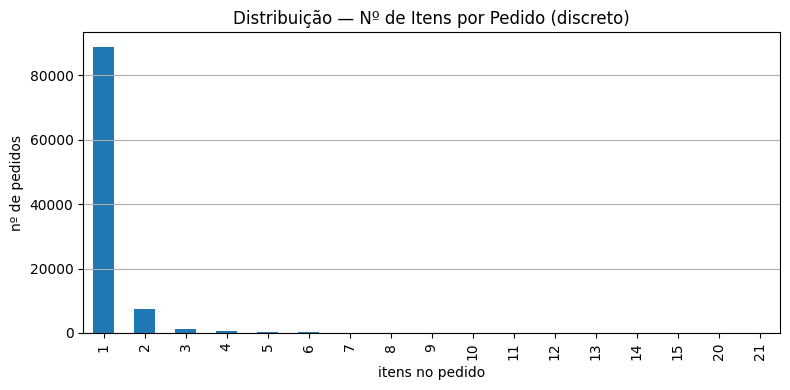

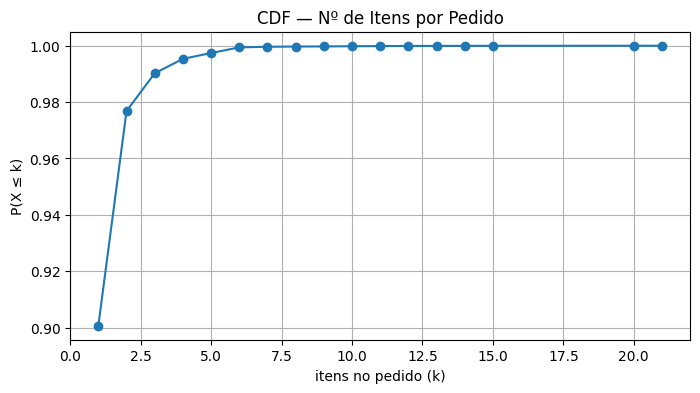

itens_por_pedido
count      98666.000000
mean           1.141731
std            0.538452
min            1.000000
25%            1.000000
50%            1.000000
75%            1.000000
max           21.000000

In [ ]:

if 'order_id' in df.columns:
    cnt = df.groupby('order_id').size()
    if len(cnt) > 0:
        freq = cnt.value_counts().sort_index()
        display(freq.to_frame('quantidade_de_pedidos'))

        plt.figure(figsize=(8,4))
        freq.plot(kind='bar')
        plt.title('Distribui√ß√£o ‚Äî N¬∫ de Itens por Pedido (discreto)')
        plt.xlabel('itens no pedido')
        plt.ylabel('n¬∫ de pedidos')
        plt.grid(True, axis='y')
        plt.tight_layout()
        plt.show()

        sorted_k = sorted(freq.index)
        cum = freq.cumsum() / freq.sum()
        plt.figure(figsize=(8,4))
        plt.plot(sorted_k, [cum.loc[k] for k in sorted_k], marker='o')
        plt.title('CDF ‚Äî N¬∫ de Itens por Pedido')
        plt.xlabel('itens no pedido (k)')
        plt.ylabel('P(X ‚â§ k)')
        plt.grid(True)
        plt.show()

        display(cnt.describe().to_frame('itens_por_pedido'))
    else:
        print("Sem pedidos para calcular distribui√ß√£o.")
else:
    print("Sem 'order_id' para calcular distribui√ß√£o de itens por pedido.")

## Conclus√£o/S√≠ntese das An√°lises da Camada Silver

A partir das etapas desenvolvidas neste notebook, foi poss√≠vel consolidar e explorar os principais aspectos anal√≠ticos da **Camada Silver**, transformando dados tratados do `treated_dataset.csv` em **informa√ß√µes estrat√©gicas** e **visuais de apoio √† decis√£o**.

Inicialmente, verificou-se a **estrutura efetiva do dataset**, garantindo a coer√™ncia entre as colunas presentes e o modelo dimensional planejado (Esquema em Estrela).  
Em seguida, realizou-se a **prepara√ß√£o das vari√°veis temporais**, com a cria√ß√£o de uma **dimens√£o de tempo derivada**, fundamental para an√°lises cronol√≥gicas consistentes.

Os **KPIs de neg√≥cio** forneceram uma vis√£o quantitativa clara sobre o desempenho operacional, permitindo observar m√©tricas como **volume bruto de vendas (GMV)**, **participa√ß√£o m√©dia do frete** e **estrutura m√©dia dos pedidos**.  
As **s√©ries temporais** e os **rankings de categorias e vendedores** complementaram essa vis√£o, revelando **padr√µes sazonais**, **concentra√ß√£o de vendas** e **produtos mais relevantes**.

As an√°lises visuais de **participa√ß√£o do frete no ticket** mostraram a import√¢ncia de compreender o impacto log√≠stico no pre√ßo final, com o uso de **histogramas, boxplots e escalas logar√≠tmicas** para evidenciar tanto o comportamento t√≠pico quanto os outliers.  
Por fim, a distribui√ß√£o de **itens por pedido** e a **curva acumulada (CDF)** destacaram a predomin√¢ncia de pedidos com poucos itens, caracter√≠stica comum em cen√°rios de varejo digital.

Em conjunto, essas etapas demonstram o papel da Camada Silver como **ponto de equil√≠brio entre dados brutos e an√°lises de alto valor**, oferecendo uma base s√≥lida e confi√°vel para dashboards, relat√≥rios gerenciais e modelos preditivos na Camada Gold.

> **Em s√≠ntese:** este notebook representa o elo anal√≠tico da arquitetura de dados; Onde a qualidade, estrutura e consist√™ncia dos dados tratados se traduzem em conhecimento de neg√≥cio acion√°vel.
